# A Gentle Autoencoder Tutorial (with keras)
 
Benjamin Irving  
30 October 2016  

<sub>https://github.com/benjaminirving/mlseminars-autoencoders </sub>

## References

- Goodfellow (2016) Deep Learning ([www.deeplearningbook.org](http://www.deeplearningbook.org))
- Doersch (2016) Tutorial on Variational Autoencoders ([arxiv.org/abs/1606.05908](https://arxiv.org/abs/1606.05908))
- Kingma (2014) Auto-Encoding Variational Bayes ([arxiv.org/abs/1312.6114](https://arxiv.org/abs/1312.6114))
- Code is based on:
https://blog.keras.io/building-autoencoders-in-keras.html



## How to run these slides yourself

**Setup python environment**

- Jupyter notebook
- Requirements: `numpy`, `keras`, `theano`, `jupyter`
- Python 3
- Install RISE for an interactive presentation viewer

**Get and run code**
```bash
# Clone the repository
git clone https://github.com/benjaminirving/mlseminars-autoencoders
cd mlseminars-autoencoders
# Run the notebook
jupyter notebook
```



## Introduction


- Neural networks
- Designed to automatically learn from unlabelled data
- Learn a compact and meaningful representation
- Unsupervised (or self-supervised) - No annotations required
- Linear version is equivalent to Principal Component Analysis but can learn much more sophisticated representations

## Introduction

- Train a neural network to reproduce the input image as the output
- A hidden layer creates a **code** that represents the output

<div align="center"><img src="imgs/d2.png" width="40%"></div>

 - hidden layer $h=f(x)$ and reconstruction $r=g(h)$
 - Autoencoders need to be **limited** or **regularised** in some way so that they can't just copy the input
 - **Forced to learn useful representations**




## Introduction

<div align="center"><img src="imgs/d1.png" width="80%"></div>


## Introduction - Applications

- Dimensionality reduction
- Feature learning
- Denoising or filling holes
- Pretraining deep networks (*not so common anymore*)

## The ultimate in unsupervised learning?

- Well... still active research in unsupervised deep learning (actually self-supervised)

**But...**
- Useful to understand autoencoders to relate to other deep networks
- Integrated into some adversarial networks, recurrent neural networks, for example, with some very interesting unsupervised applications
- Medical imaging with large unlabelled data...?

## Basic autoencoder example in Keras (keras.io)



<div align="center"><img src="imgs/d1.png" width="80%"></div>


Based on: https://blog.keras.io/building-autoencoders-in-keras.html

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(inputs=input_img, outputs=decoded)
print("autoencoder model created")

autoencoder model created


In [6]:
# this model maps an input to its encoded representation
encoder = Model(inputs=input_img, outputs=encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(inputs=encoded_input, outputs=decoder_layer(encoded_input))

In [7]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [8]:
 
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

# plt.imshow(x_train[2001], cmap='gray')

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)



11490434/11490434 [==============================] - 1s 0us/step
(60000, 784)
(10000, 784)


In [10]:
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
235/235 [==============================] - 1s 4ms/step - loss: 0.2822 - val_loss: 0.1933
Epoch 2/5
235/235 [==============================] - 1s 3ms/step - loss: 0.1690 - val_loss: 0.1508
Epoch 3/5
235/235 [==============================] - 1s 3ms/step - loss: 0.1428 - val_loss: 0.1327
Epoch 4/5
235/235 [==============================] - 1s 3ms/step - loss: 0.1282 - val_loss: 0.1210
Epoch 5/5
235/235 [==============================] - 1s 3ms/step - loss: 0.1183 - val_loss: 0.1127


313/313 [==============================] - 0s 638us/step


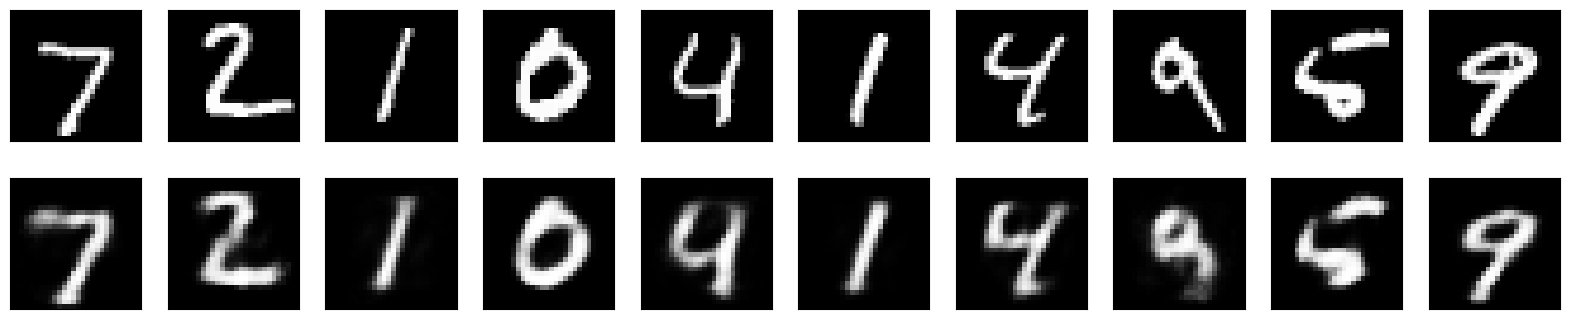

In [11]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(10):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Basic example
- Learnt a representation of handwriting using only 32 features
- Single hidden layer but representation is easily extendible to a deep neural network
- Code snippet below shows the modification for the deep network (**this snippet not runnable**). For the full example see the [keras blog](https://blog.keras.io/building-autoencoders-in-keras.html)

In [12]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

## Fully connected vs convolutional layers



- Previous method showed dense layers
- For Images it makes sense to take advantage of the convolutional approach
- i.e. reuse weights across the image
- Encoder and decoder steps are now convolutional layers
- **Basically a fully convolutional network but self-supervised** 
(if the encoding layer is also convolutional)

<img src="imgs/d5.png">

## Convolutional example

Based on: https://blog.keras.io/building-autoencoders-in-keras.html

In [14]:
from keras.layers import Input, Dense, Convolution2D, MaxPooling2D, UpSampling2D
from keras.models import Model

input_img = Input(shape=(1, 28, 28))

x = Convolution2D(16, 3, 3, activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Convolution2D(8, 3, 3, activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Convolution2D(8, 3, 3, activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (8, 4, 4) i.e. 128-dimensional
x = Convolution2D(8, 3, 3, activation='relu', padding='same')(encoded)

x = UpSampling2D((2, 2))(x)
x = Convolution2D(8, 3, 3, activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Convolution2D(16, 3, 3, activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Convolution2D(1, 3, 3, activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

ValueError: Exception encountered when calling layer "conv2d_5" (type Conv2D).

Negative dimension size caused by subtracting 3 from 2 for '{{node conv2d_5/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 3, 3, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_5/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,8], [3,3,8,16].

Call arguments received by layer "conv2d_5" (type Conv2D):
  • inputs=tf.Tensor(shape=(None, 2, 2, 8), dtype=float32)

In [12]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 1, 28, 28))
x_test = np.reshape(x_test, (len(x_test), 1, 28, 28))

In [ ]:
autoencoder.fit(x_train, x_train,
                nb_epoch=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))
autoencoder.save_weights('data/convauto.h5')

loading weights
predicting output


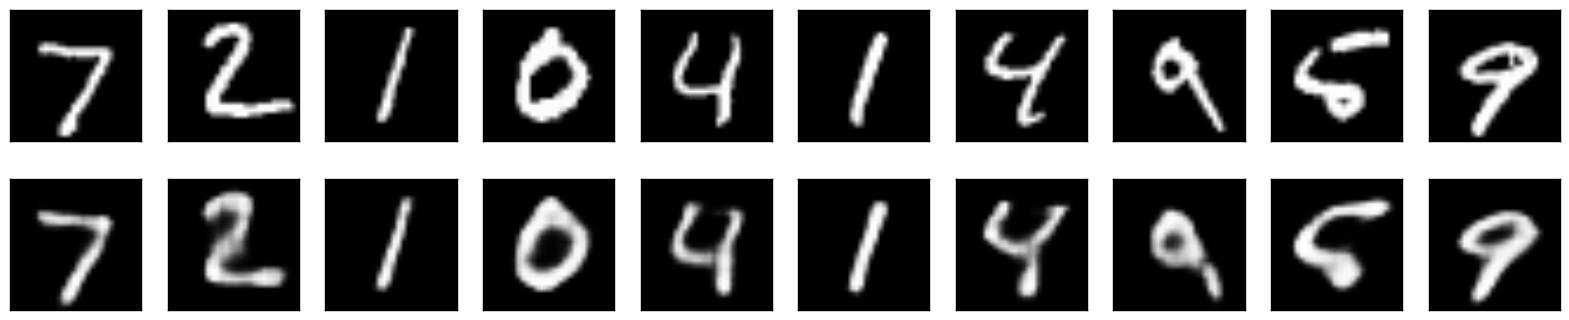

In [13]:
print("loading weights")
autoencoder.load_weights('data/convauto.h5')

print("predicting output")
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    
    # original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Regularisation types


- Recap: Encoder and and decoder steps can be fully connected, convolutional, recurrent...
- Key feature of the autoencoder is some type of "regularisation"

Types:
    - Undercomplete autoencoder
    - Denosoising autoencoder
    - Sparsity
    - Variational autoencoder

## Undercomplete autoencoder
- Limit the number of hidden units

<div align="center"> <img src="imgs/d1.png" width="60%"> </div>


## Denoising autoencoder
- learn a more robust representation by forcing the autoencoder to learn an input from a corrupted version of itself
- Autoencoders and inpainting
    - Stronger variant of denoising autoencoders

<div align="center"><img src="imgs/d3.png" width="60%"></div>
- inpaint and denoising can also be the aim

## Sparse autoencoder

- Add a sparsity constraint to the hidden layer
- Still discover interesting variation even if the number of hidden nodes is large
- Mean activation for a single unit:
$$ \rho_j = \frac{1}{m} \sum^m_{i=1} a_j(x^{(i)})$$
- Add a penalty that limits of overall activation of the layer to a small value
- `activity_regularizer` in keras

<sub> Reference: http://web.stanford.edu/class/cs294a/sae/sparseAutoencoderNotes.pdf </sub>

## Variational autoencoders (VAE)

- Probabalistic approach to autoencoders
- Constraints on the encoded representations being learned
- Instead of learning an arbitrary representation
- Now learns a **Latent Variable Model** of the data 
    - unobserved variables that represent a probabalistic model
- Allows unsupervised learning of complex distributions
- Generally no parameter tuning required


## VAE - Latent variable model

- Learns a set of latent variables that roughly follow unit gaussian
- decoder acts as a complex mapping function of the latent variable

**any distribution in $d$ dimensions can be generated by taking a set of d normally distributed variables, and mapping them through a complex function**

- Performed in the network using a simple parameterisation trick
    - instead of learning real values, we learning means and standard deviations in the encoding


<img src="imgs/d4.png">

<sub> References: http://kvfrans.com/variational-autoencoders-explained/ </sub>

In [ ]:
z_mean = Dense(2)(hidden)
z_log_var = Dense(2)(hidden)


def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(batch_size, 2),
                              mean=0., std=epsilon_std)
    return z_mean + K.exp(z_log_var) * epsilon

# Just used to evaluate a previous expression
z = Lambda(sampling, output_shape=(2,))([z_mean, z_log_var])

## VAE - Loss
- Optimisation is performed using a modified loss function that combines two errors. 
- 1) Image error
    - Means squared error or cross entropy
    - Binary cross entropy: $H(p, q) = - \sum_x p(x) \log q(x)$
    - Measures how closely the recostructed image matches the original image
- 2) KL Divergence
    - KL Divergence: $D_{KL}(P||Q) = \int_{-\infty}^{\infty} p(x) \log \frac{p(x)}{q(x)}dx$
    - How closely the latent variables match a unit gaussian

## Why
- Allows unsupervised learning of complex distributions
- Generally no parameter tuning required
- Generative model so provides a framework for generation of new examples
- Lots of extensions that I will get into later...

## Demo: Learned face manifold

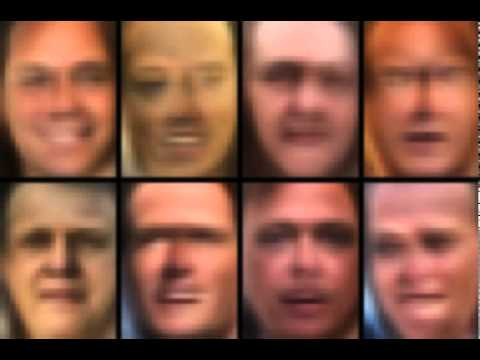

In [14]:

from IPython.display import YouTubeVideo
YouTubeVideo("nHX7hCeOtFc")


## Variational autoencoder example
From: https://github.com/fchollet/keras/blob/master/examples/variational_autoencoder_deconv.py


In [2]:

import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Input, Dense, Lambda, Flatten, Reshape
from keras.layers import Convolution2D, Deconvolution2D
from keras.models import Model
from keras import backend as K
from keras import objectives
from keras.datasets import mnist


Using Theano backend.


In [3]:
# input image dimensions
img_rows, img_cols, img_chns = 28, 28, 1
# number of convolutional filters to use
nb_filters = 64
# convolution kernel size
nb_conv = 3

batch_size = 100
if K.image_dim_ordering() == 'th':
    original_img_size = (img_chns, img_rows, img_cols)
else:
    original_img_size = (img_rows, img_cols, img_chns)
latent_dim = 2
intermediate_dim = 128
epsilon_std = 0.01

In [4]:
# Define model

x = Input(batch_shape=(batch_size,) + original_img_size)
conv_1 = Convolution2D(img_chns, 2, 2, border_mode='same', activation='relu')(x)
conv_2 = Convolution2D(nb_filters, 2, 2,
                       border_mode='same', activation='relu',
                       subsample=(2, 2))(conv_1)
conv_3 = Convolution2D(nb_filters, nb_conv, nb_conv,
                       border_mode='same', activation='relu',
                       subsample=(1, 1))(conv_2)
conv_4 = Convolution2D(nb_filters, nb_conv, nb_conv,
                       border_mode='same', activation='relu',
                       subsample=(1, 1))(conv_3)
flat = Flatten()(conv_4)
hidden = Dense(intermediate_dim, activation='relu')(flat)

z_mean = Dense(latent_dim)(hidden)
z_log_var = Dense(latent_dim)(hidden)


def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(batch_size, latent_dim),
                              mean=0., std=epsilon_std)
    return z_mean + K.exp(z_log_var) * epsilon

# note that "output_shape" isn't necessary with the TensorFlow backend
# so you could write `Lambda(sampling)([z_mean, z_log_var])`
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

# we instantiate these layers separately so as to reuse them later
decoder_hid = Dense(intermediate_dim, activation='relu')
decoder_upsample = Dense(nb_filters * 14 * 14, activation='relu')

if K.image_dim_ordering() == 'th':
    output_shape = (batch_size, nb_filters, 14, 14)
else:
    output_shape = (batch_size, 14, 14, nb_filters)

decoder_reshape = Reshape(output_shape[1:])
decoder_deconv_1 = Deconvolution2D(nb_filters, nb_conv, nb_conv,
                                   output_shape,
                                   border_mode='same',
                                   subsample=(1, 1),
                                   activation='relu')
decoder_deconv_2 = Deconvolution2D(nb_filters, nb_conv, nb_conv,
                                   output_shape,
                                   border_mode='same',
                                   subsample=(1, 1),
                                   activation='relu')
if K.image_dim_ordering() == 'th':
    output_shape = (batch_size, nb_filters, 29, 29)
else:
    output_shape = (batch_size, 29, 29, nb_filters)
decoder_deconv_3_upsamp = Deconvolution2D(nb_filters, 2, 2,
                                          output_shape,
                                          border_mode='valid',
                                          subsample=(2, 2),
                                          activation='relu')
decoder_mean_squash = Convolution2D(img_chns, 2, 2,
                                    border_mode='valid',
                                    activation='sigmoid')

hid_decoded = decoder_hid(z)
up_decoded = decoder_upsample(hid_decoded)
reshape_decoded = decoder_reshape(up_decoded)
deconv_1_decoded = decoder_deconv_1(reshape_decoded)
deconv_2_decoded = decoder_deconv_2(deconv_1_decoded)
x_decoded_relu = decoder_deconv_3_upsamp(deconv_2_decoded)
x_decoded_mean_squash = decoder_mean_squash(x_decoded_relu)

def vae_loss(x, x_decoded_mean):
    # NOTE: binary_crossentropy expects a batch_size by dim
    # for x and x_decoded_mean, so we MUST flatten these!
    x = K.flatten(x)
    x_decoded_mean = K.flatten(x_decoded_mean)
    xent_loss = img_rows * img_cols * objectives.binary_crossentropy(x, x_decoded_mean)
    kl_loss = - 0.5 * K.mean(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
    return xent_loss + kl_loss

vae = Model(x, x_decoded_mean_squash)
vae.compile(optimizer='rmsprop', loss=vae_loss)
# vae.summary()

In [5]:
# train the VAE on MNIST digits
(x_train, _), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_train = x_train.reshape((x_train.shape[0],) + original_img_size)
x_test = x_test.astype('float32') / 255.
x_test = x_test.reshape((x_test.shape[0],) + original_img_size)

print('x_train.shape:', x_train.shape)


x_train.shape: (60000, 1, 28, 28)


In [16]:
nb_epoch = 5
vae.fit(x_train, x_train,
        shuffle=True,
        nb_epoch=nb_epoch,
        batch_size=batch_size,
validation_data=(x_test, x_test))

vae.save_weights('data/vaeauto.h5')

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 743s - loss: 192.5100 - val_loss: 162.1145
Epoch 2/5
60000/60000 [==============================] - 814s - loss: 153.0892 - val_loss: 150.6484
Epoch 3/5
60000/60000 [==============================] - 892s - loss: 145.8943 - val_loss: 143.1185
Epoch 4/5
60000/60000 [==============================] - 860s - loss: 142.1661 - val_loss: 142.2536
Epoch 5/5
60000/60000 [==============================] - 910s - loss: 139.9828 - val_loss: 139.9798


In [6]:
vae.load_weights('data/vaeauto.h5')
validation_data=(x_test, x_test)
# build a model to project inputs on the latent space
encoder = Model(x, z_mean)
# display a 2D plot of the digit classes in the latent space
x_test_encoded = encoder.predict(x_test, batch_size=batch_size)

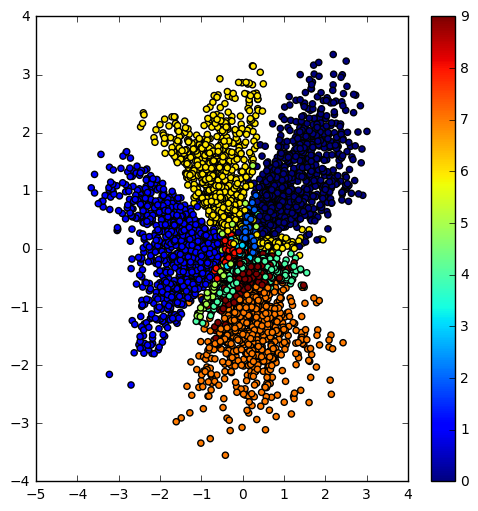

In [7]:

plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test, cmap="jet")
plt.colorbar()
plt.show()


In [20]:
# build a digit generator that can sample from the learned distribution
decoder_input = Input(shape=(latent_dim,))
_hid_decoded = decoder_hid(decoder_input)
_up_decoded = decoder_upsample(_hid_decoded)
_reshape_decoded = decoder_reshape(_up_decoded)
_deconv_1_decoded = decoder_deconv_1(_reshape_decoded)
_deconv_2_decoded = decoder_deconv_2(_deconv_1_decoded)
_x_decoded_relu = decoder_deconv_3_upsamp(_deconv_2_decoded)
_x_decoded_mean_squash = decoder_mean_squash(_x_decoded_relu)
generator = Model(decoder_input, _x_decoded_mean_squash)

# display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))

grid_x = np.linspace(-0.7, 0.7, n)
grid_y = np.linspace(-0.7, 0.7, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        z_sample = np.tile(z_sample, batch_size).reshape(batch_size, 2)
        x_decoded = generator.predict(z_sample, batch_size=batch_size)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit


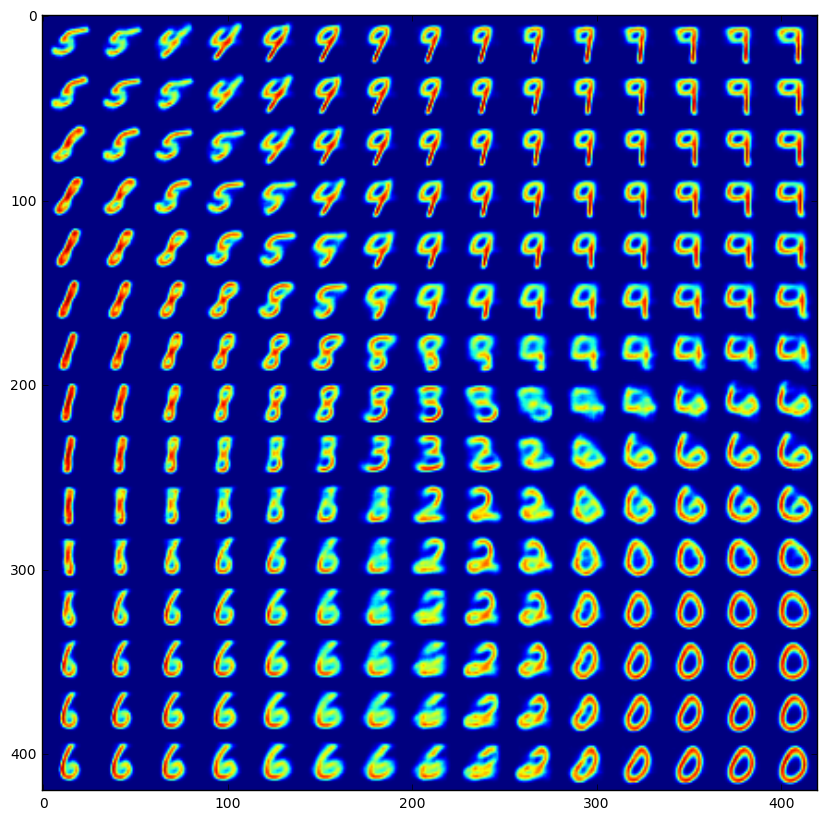

In [21]:
plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap="jet")
plt.show()

## Unsupervised deep learning beyond autoencoders


## Example 1: Unsupervised Learning of Visual Representations by Solving Jigsaw Puzzles

- https://arxiv.org/pdf/1603.09246v2.pdf
- Sample 256 x 256 region from image
- Sample 9 64 x 64 tiles
- Randomly permute the tiles using a subset of 100 possible permutations
- Context Free Network
    - Alexnet for each tile
    - Share weights
    - Train context free network to learn the permutation
- Output probability of each of the 100 permutations
- By learning to solve a jigsaw puzzel, the underlying filters are learnt
- **Training a CNN style network without labelled data!**


## Unsupervised Learning of Visual Representations by Solving Jigsaw Puzzles

<img src="imgs_rem/puzzels.jpg">


## Unsupervised Learning of Visual Representations by Solving Jigsaw Puzzles

<img src="imgs_rem/puzzels2.png">


## Unsupervised Learning of Visual Representations by Solving Jigsaw Puzzles

<img src="imgs_rem/puzzels3.png">

## Transfer learning of Visual representation
- Transfer learning of CFN features to classification of PASCAL VOC 2007 dataset
- Just retrain fully connected layers?
- Outperform other unsupervised learning methods

 ## Example 2: Unsupervised Representation Learning with Deep Convolutional Generative Adversarial Networks
- https://arxiv.org/pdf/1511.06434v2.pdf and https://github.com/Newmu/dcgan_code
- I think Felix will tell you more about this interesting topic
- Generative aspect has some relation to variational autoencoders

 


<img src="https://github.com/Newmu/dcgan_code/raw/master/images/faces_arithmetic_collage.png" width="50%"></img>
Image from https://github.com/Newmu/dcgan_code (MIT license)

  

## Example 3: DRAW - Deep Reccurrent Attentive Writer
- https://arxiv.org/abs/1502.04623
- Combines a spatial attention mechanism with a variational autoencoder
- Sequential construction
    - Evaluate after each iteration
    - More natural
- Encoders and decoders are reccurrent neural networks
- RNN provides a framework for choosing where to sequentially read and write
- ...as well as what to write
- Combined with a variational autoencoder to determine latent variables



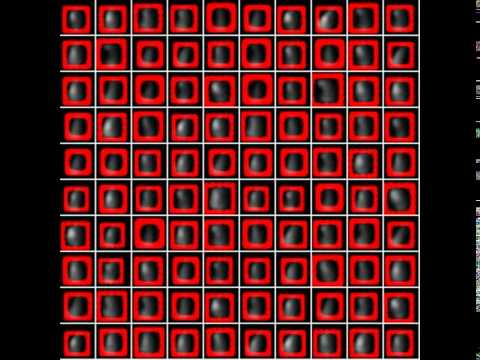

In [15]:
from IPython.display import YouTubeVideo
YouTubeVideo("Zt-7MI9eKEo")

## Thanks

In [16]:
print("Thanks")

Thanks
